In [1]:
import pandas as pd
import glob
import os

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load data
def load_reports(directory_path):
    csv_files = glob.glob(os.path.join(directory_path, "*Report.csv"))
    reports = []
    for file in csv_files:
        reports.append(pd.read_csv(file, index_col=0, low_memory=False))
    return pd.concat(reports, ignore_index=True)


qmastor_rail_data_dump = pd.read_csv(".\data\QMASTOR rail data dump.csv", low_memory=False, index_col=0)
reports = load_reports("data")

In [4]:
reports.head()

,Date,Year,Month,Week_of_Year,Week_of_Month,BU_Name,SalesGrouping,Flow_Name,Flow_Source,Flow_Destination,...,THT,TFR Delay subtracted,TLT,Plan Note External,Act Note External,CX_Group,CX_Reason,Cancellation Notes,Actual Notes,FirstOfEntry_ID
0,2009-01-01 00:00:00,2009,1,1,1,Location54,Exports,Location54 to Location125 FOR - Coking Coal,Location54,Location125,...,5.916667,0.0,4.583333,Train 8077865078 planned for 2009/01/02 arrive...,Train 8077865078 was planned for 2009/01/02 bu...,None,No Cancellation,None,NaN,1650
1,2009-01-01 00:00:00,2009,1,1,1,Location74,Domestic Clients,Location74 to Location73,Location74,Location76,...,NaN,0.0,NaN,Train did not run,NaN,None,No Cancellation,None,NaN,955
2,2009-01-01 00:00:00,2009,1,1,1,Location74,Domestic Clients,Location74 to Location160,Location74,Location176,...,NaN,0.0,NaN,Train did not run,NaN,None,No Cancellation,None,NaN,979
3,2009-01-01 00:00:00,2009,1,1,1,Location74,Location38,Location74 to Location82,Location74,Location82,...,1.416667,0.0,1.416667,NaN,Train was not planned,None,No Cancellation,None,NaN,910
4,2009-01-01 00:00:00,2009,1,1,1,Location74,Location38,Location74 to Location82,Location74,Location82,...,2.000000,0.0,2.000000,NaN,NaN,None,No Cancellation,None,NaN,909


In [5]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34044 entries, 0 to 34043
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  34044 non-null  object 
 1   Year                  34044 non-null  object 
 2   Month                 34044 non-null  object 
 3   Week_of_Year          34044 non-null  object 
 4   Week_of_Month         34044 non-null  object 
 5   BU_Name               34044 non-null  object 
 6   SalesGrouping         34044 non-null  object 
 7   Flow_Name             34044 non-null  object 
 8   Flow_Source           34044 non-null  object 
 9   Flow_Destination      34044 non-null  object 
 10  SP_Name               34033 non-null  object 
 11  NWB Export Account    34044 non-null  object 
 12  NWB Exp Stockp        34040 non-null  object 
 13  Act_Acc_No            5289 non-null   float64
 14  Act Export Account    34044 non-null  object 
 15  Act Exp Stockp     

In [6]:
# Analysis
reports['Year'].value_counts()

2013    3506
2010    3479
2011    3335
2012    3273
2014    3187
2009    3070
2019    2966
2017    2662
2018    2483
2015    2475
2016    2376
2020    1232
Name: Year, dtype: int64

In [7]:
# metadata of qmaster dataset
qmastor_rail_data_dump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427419 entries, 0 to 427418
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CargoMovementID                         427419 non-null  int64  
 1   CargoMovementName                       427296 non-null  object 
 2   BU                                      427371 non-null  object 
 3   Customer                                424752 non-null  object 
 4   Route                                   125247 non-null  object 
 5   NWB trains.NWBPreliminaryDate           427419 non-null  object 
 6   NWB trains.NWBConfirmedDate             427419 non-null  object 
 7   THTs.T1                                 427419 non-null  object 
 8   THTs.SL                                 427419 non-null  object 
 9   THTs.FL                                 427419 non-null  object 
 10  THTs.T2                                 4274

### Are both datasets same or can be joined?

In [8]:
qmastor_rail_data_dump['Route']

0                               NaN
1         Location190 to Location82
2         Location190 to Location82
3         Location190 to Location82
4         Location190 to Location82
                    ...            
427414                          NaN
427415    Location74 to Location125
427416    Location74 to Location125
427417                          NaN
427418                          NaN
Name: Route, Length: 427419, dtype: object

In [9]:
reports['Flow_Name']

0          Location54 to Location125 FOR - Coking Coal
1                             Location74 to Location73
2                            Location74 to Location160
3                             Location74 to Location82
4                             Location74 to Location82
                             ...                      
34039      Location47 to Location125 (Location205 LTA)
34040    Location54 to Location125 (Location40 WB LTA)
34041    Location54 to Location125 (Location40 WB LTA)
34042    Location74 to Location125 (Location40 MP LTA)
34043    Location74 to Location125 (Location40 MP LTA)
Name: Flow_Name, Length: 34044, dtype: object

- Both datasets are having different locations, so they are different datasets

- **Check out the duplicate rows**

In [58]:
qmastor_rail_data_dump.duplicated().value_counts()

False    237156
True     190263
dtype: int64

In [60]:
qmastor_rail_data_dump = qmastor_rail_data_dump.drop_duplicates(keep='last')

In [62]:
reports.duplicated().value_counts()

False    34044
dtype: int64

- There is no duplicates in reports df while qmaster dataset has many duplicates

## QMASTER data analysis

In [63]:
# crete a subdataframe of important features and drop non-essential features
qmaster = qmastor_rail_data_dump.drop(columns=['CargoMovementID','CargoMovementName','Cancelled.ReasonCode','Wagons.DTK'])

In [64]:
qmaster.head()

,BU,Customer,Route,NWB trains.NWBPreliminaryDate,NWB trains.NWBConfirmedDate,THTs.T1,THTs.SL,THTs.FL,THTs.T2,THTs.Departed,...,Destination.DestinationQuantSum,Destination.Split,Consignment,Cancelled.ReasonGroup,Cancelled.ReasonSubgroup,Wagons.Planned,Wagons.Actual,Wagons.Tipped,Wagons.Bypassed,Wagons.Tonnes
0,Location74 Location194 Coal,Location34,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Location74 Location194 Coal,Location62,Location190 to Location82,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,2011-09-13 22:45:00,2011-09-13 23:45:00,NaT,...,NaN,NaN,8082367791,NaN,NaN,NaN,6.0,NaN,NaN,1000.00
7,Location63 Location194 Coal,Location37,Location191 to Location125 (Location209),NaT,NaT,2011-09-17 08:10:00,2011-09-17 08:30:00,2011-09-17 13:00:00,2011-09-17 13:05:00,2011-09-17 15:20:00,...,8173.0,1.0,8082991066,NaN,NaN,NaN,98.0,NaN,NaN,84.22
8,Location63 Location194 Coal,Location37,Location191 to Location125 (Location209),NaT,NaT,2011-09-17 08:10:00,2011-09-17 08:30:00,2011-09-17 13:00:00,2011-09-17 13:05:00,2011-09-17 15:20:00,...,8173.0,1.0,8082991066,NaN,NaN,NaN,98.0,NaN,NaN,81.12
9,Location63 Location194 Coal,Location37,Location191 to Location125 (Location209),NaT,NaT,2011-09-17 08:10:00,2011-09-17 08:30:00,2011-09-17 13:00:00,2011-09-17 13:05:00,2011-09-17 15:20:00,...,8173.0,1.0,8082991066,NaN,NaN,NaN,98.0,NaN,NaN,80.66


### Univariate analysis

In [65]:
# cancellation reasons
qmastor_rail_data_dump['Cancelled.ReasonGroup'].value_counts()

Cancelled                             5219
Location172 NO Prelim                   18
Location172 No Prelim-Not Approved       4
Location172 Decline                      2
Name: Cancelled.ReasonGroup, dtype: int64

In [66]:
# cancellation sub reasons
qmastor_rail_data_dump['Cancelled.ReasonSubgroup'].value_counts()

Location172    3764
BU              745
Client          582
Marketing        80
Location38       30
Location125      29
Logistics        13
Name: Cancelled.ReasonSubgroup, dtype: int64

In [67]:
# how many items were loaded 
qmastor_rail_data_dump['Destination.Split'].value_counts()

1.0    76041
2.0     2364
3.0       25
Name: Destination.Split, dtype: int64

- Most of the trains are carrying only 1 item while there trains which are caryying 2 or 3 number of items in some cases

In [68]:
qmastor_rail_data_dump[['Wagons.Planned','Wagons.Actual','Wagons.Tonnes']].describe()

,Wagons.Planned,Wagons.Actual,Wagons.Tonnes
count,73573.000000,216650.000000,216650.000000
mean,76.612521,73.327607,181.568266
std,58.838068,23.070124,802.864418
min,0.000000,1.000000,0.000000
25%,73.000000,50.000000,54.490000
50%,75.000000,75.000000,58.350000
75%,100.000000,99.000000,59.688000
max,8400.000000,200.000000,59930.160000


- There's very lesss deviation in planned vs actual wagons with some exceptions

In [70]:
qmaster['BU'].value_counts()

Location54 Location194 Coal              145527
Location74 Location194 Coal               63495
Location63 Location194 Coal               21494
Location80 Location194 Coal                2771
Location13                                 1213
Location40 HQP                             1101
Location47 North                            610
Location22 East                             552
Location105 Location194 Coal                329
Location40 International Trading AG           9
Location103 Location194 Coal                  3
Location40 International Trading B.V.         3
Location182                                   1
Name: BU, dtype: int64

In [71]:
qmaster['Customer'].value_counts()

Location35 EITAG    45976
Location37          33156
Location5           28589
Location4           27076
Location34          23920
                    ...  
Location61              1
Location62              1
Location66              1
Location178             1
Location7               1
Name: Customer, Length: 66, dtype: int64

In [72]:
qmaster['Route'].value_counts()

Location54 to Location125 Delivered - Coking Coal      22715
Location193 to Location92                               9587
Location193 to Location97                               8806
Location193 to Location95                               7054
Location193 to Location96                               6610
                                                       ...  
Location74 to Location195                                  1
Location74 to Location213 Location212 (Location203)        1
Location193 Location162 to Location125                     1
Location54 to Location14                                   1
Location63 to Location83 (Location199)                     1
Name: Route, Length: 72, dtype: int64

In [73]:
qmaster['Consignment'].value_counts()

8084168924    194
8086937632    190
8083408063    185
8087001866    184
8084106105    170
             ... 
8091088811      1
8091169199      1
8091169213      1
8091169287      1
8097774682      1
Name: Consignment, Length: 20581, dtype: int64

1. Find out the difference between preliminary date and actual date when train will run

In [74]:
# convert object cols into datetime
qmaster['NWB trains.NWBPreliminaryDate'] = pd.to_datetime(qmaster['NWB trains.NWBPreliminaryDate'])
qmaster['NWB trains.NWBConfirmedDate'] = pd.to_datetime(qmaster['NWB trains.NWBConfirmedDate'])


In [75]:
# see if there's diff in preliminary and confirm date
qmaster['start_diff'] = qmaster['NWB trains.NWBPreliminaryDate'] < qmaster['NWB trains.NWBConfirmedDate'] 

In [76]:
qmaster['start_diff'].value_counts()

False    230148
True       7008
Name: start_diff, dtype: int64

In [77]:
qmaster[qmaster['start_diff'] == True][['NWB trains.NWBPreliminaryDate','NWB trains.NWBConfirmedDate']]

,NWB trains.NWBPreliminaryDate,NWB trains.NWBConfirmedDate
167354,2013-11-24 14:27:00,2013-11-24 15:00:00
169160,2013-11-30 10:32:00,2013-12-01 00:00:00
203087,2014-04-07 00:00:00,2014-04-13 00:00:00
203088,2014-04-09 00:00:00,2014-04-14 00:00:00
203089,2014-04-10 00:00:00,2014-04-15 00:00:00
...,...,...
427076,2023-04-19 00:00:00,2023-04-21 19:03:00
427090,2023-04-27 12:00:00,2023-04-28 00:00:00
427091,2023-04-28 12:00:00,2023-04-29 00:00:00
427230,2023-05-31 12:00:00,2023-06-03 00:00:00


- there are about 7008 trains which got delayed

2. Find out diff between cargo movement end date and actual arrival date at customer site

In [78]:
# convert object cols into datetime
qmaster['CargoMovementEndDate'] = pd.to_datetime(qmaster['NWB trains.NWBPreliminaryDate'])
qmaster['Destination.DestinationTransactionDate'] = pd.to_datetime(qmaster['NWB trains.NWBConfirmedDate'])

In [79]:
qmaster['end_diff'] = qmaster['CargoMovementEndDate'] < qmaster['Destination.DestinationTransactionDate'] 

In [80]:
qmaster['end_diff'].value_counts()

False    230148
True       7008
Name: end_diff, dtype: int64

In [81]:
qmaster[qmaster['end_diff'] == True][['CargoMovementEndDate','Destination.DestinationTransactionDate']]

,CargoMovementEndDate,Destination.DestinationTransactionDate
167354,2013-11-24 14:27:00,2013-11-24 15:00:00
169160,2013-11-30 10:32:00,2013-12-01 00:00:00
203087,2014-04-07 00:00:00,2014-04-13 00:00:00
203088,2014-04-09 00:00:00,2014-04-14 00:00:00
203089,2014-04-10 00:00:00,2014-04-15 00:00:00
...,...,...
427076,2023-04-19 00:00:00,2023-04-21 19:03:00
427090,2023-04-27 12:00:00,2023-04-28 00:00:00
427091,2023-04-28 12:00:00,2023-04-29 00:00:00
427230,2023-05-31 12:00:00,2023-06-03 00:00:00


- We have identified rows which are having delayed trains
- The delayed trains are having same dates during start of run and at the arrival which indecates that both there is some descrepency in recording of these dates.
- Overall, we can assume that there are `7008` rows which are having train dalays. we will analyze these columns further to identify potential reasons behind these delays.

### Analysis of delayed trains with influncing factors

1. Analysis of BU

In [82]:
def train_delay_cancel(feature1):
    cross_tab = pd.crosstab(qmaster[feature1], qmaster['start_diff'])
    return pd.DataFrame(cross_tab)

def stack_viz(feature1):
    cross_tab = pd.crosstab(qmaster[feature1], qmaster['start_diff'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {feature1} vs. Start_diff')
    plt.xlabel(f'{feature1}')
    plt.ylabel('Count')
    plt.show()

train_delay_cancel('BU')

start_diff,False,True
BU,,
Location103 Location194 Coal,3,0
Location105 Location194 Coal,329,0
Location13,1198,15
Location182,1,0
Location22 East,538,14
Location40 HQP,1093,8
Location40 International Trading AG,9,0
Location40 International Trading B.V.,3,0
Location47 North,586,24


- Most number of delayed happened by BU `Location54 Location194 Coal`

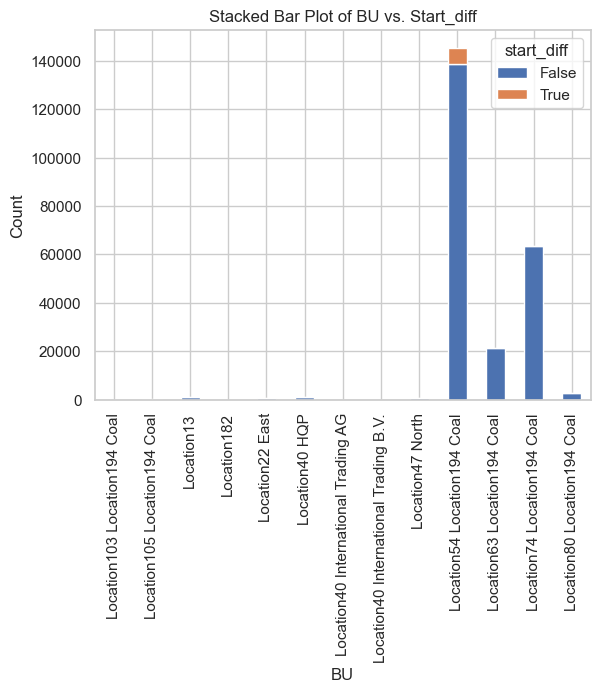

In [83]:
stack_viz('BU')

2. Analysis of Customer

In [84]:
train_delay_cancel('Customer')

start_diff,False,True
Customer,,
Location0,41,0
Location1,1,0
Location10,1202,0
Location101,16,0
Location102,60,0
...,...,...
Location72,3,0
Location78,99,1
Location79,79,0


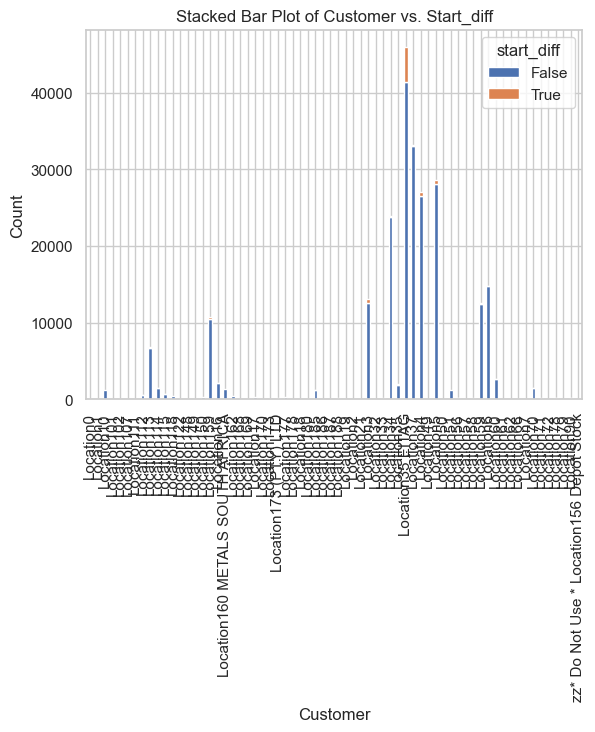

In [85]:
stack_viz('Customer')

3. Analysis of Route

In [86]:
train_delay_cancel('Route')

start_diff,False,True
Route,,
Location105 to Location125,24,0
Location13 to Location125,1199,15
Location13 to Location83 (CoAL),3,0
Location162 : Location197 from Location154,153,0
Location162 : Location197 from Location181,79,0
...,...,...
Location74 to Location67,468,1
Location74 to Location73,48,1
Location74 to Location83 (CoAL),77,0


4. By Destination.Split (multiple products)

In [87]:
train_delay_cancel('Destination.Split')

start_diff,False,True
Destination.Split,,
1.0,71669,4372
2.0,2362,2
3.0,24,1


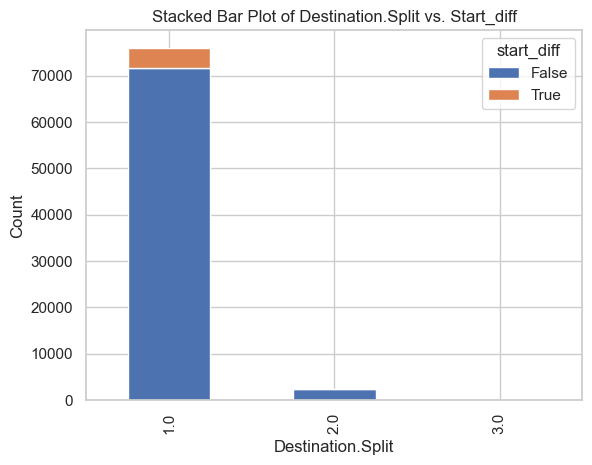

In [88]:
stack_viz('Destination.Split')

- Majority of trains were with 1 item. and also trains with 1 items mostly delayed

5. By Consignment (Rail service provider UID)

In [89]:
train_delay_cancel('Consignment')

start_diff,False,True
Consignment,,
0,49,0
0000000000A,5,0
10072987,1,0
1234567,1,0
123456789,1,0
...,...,...
Split from GLK-04-3846,1,0
TEST123,1,0
Test,0,1


- Consignment feature has many incorrect values. there are some dummy values added in the dataset

6. By Destination.DestinationQuantSum (arrival tonnes)

In [90]:
train_delay_cancel('Destination.DestinationQuantSum')

start_diff,False,True
Destination.DestinationQuantSum,,
0.24,11,0
1.00,1,0
5.00,1,0
107.00,1,0
121.00,1,0
...,...,...
25800.48,90,0
38546.47,55,0
42558.88,90,0


7. By wagons planned

In [91]:
train_delay_cancel('Wagons.Planned')

start_diff,False,True
Wagons.Planned,,
0.0,190,1
1.0,1,0
2.0,0,1
3.0,1,3
4.0,2,0
5.0,6,3
19.0,19,0
20.0,1,0
21.0,1,0


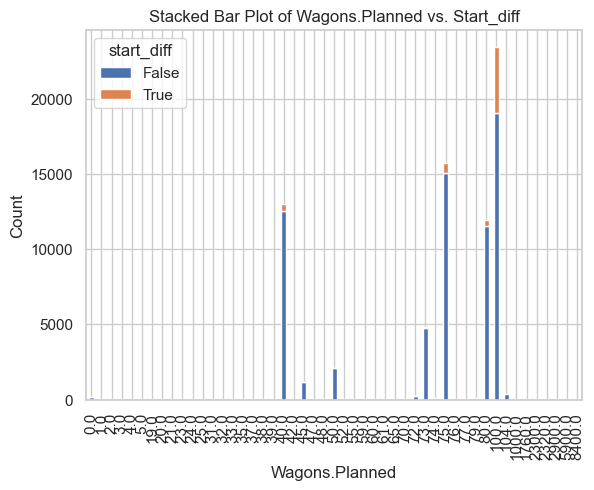

In [92]:
stack_viz('Wagons.Planned')

- there are some outliers in the data. wagons cannot be 1000 for any train. wagons grater than 1000 is wrong data.
- Here, too some trains with certain number of wagons are having delayed train while others are not delayed

8. By cancel group

In [93]:
train_delay_cancel('Cancelled.ReasonGroup')

start_diff,False,True
Cancelled.ReasonGroup,,
Cancelled,5115,104
Location172 Decline,2,0
Location172 NO Prelim,18,0
Location172 No Prelim-Not Approved,4,0


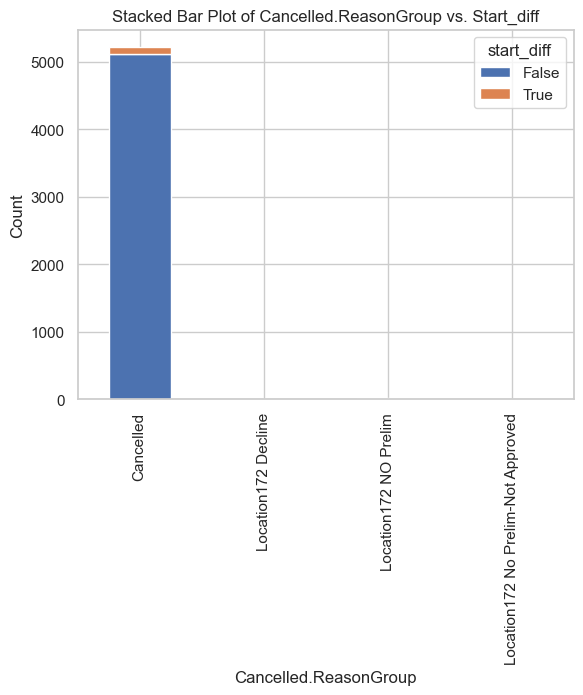

In [94]:
stack_viz('Cancelled.ReasonGroup')

- It is contradictory to note that some of the cancelled trains were delayed as well. This can be case of descrepency and wrong record of data. 

- By cancel subgroup

In [95]:
train_delay_cancel('Cancelled.ReasonSubgroup')

start_diff,False,True
Cancelled.ReasonSubgroup,,
BU,738,7
Client,577,5
Location125,29,0
Location172,3673,91
Location38,30,0
Logistics,13,0
Marketing,79,1


9. by tonnes loaded into the rail

In [96]:
train_delay_cancel('Wagons.Tonnes')

start_diff,False,True
Wagons.Tonnes,,
0.000,300,0
0.040,12,0
0.050,8,0
0.059,1,0
0.060,38,0
...,...,...
11115.320,1,0
11398.540,1,0
11489.160,1,0


10. By actual wagons arrived

In [97]:
train_delay_cancel('Wagons.Actual')

start_diff,False,True
Wagons.Actual,,
1.0,13,0
2.0,17,1
3.0,95,2
4.0,38,0
5.0,115,6
...,...,...
129.0,1,0
130.0,1,0
159.0,1,0


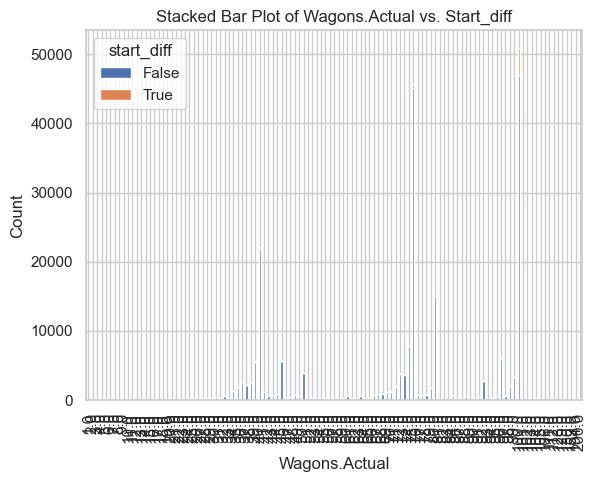

In [98]:
stack_viz('Wagons.Actual')

### Wagon deviation

In [99]:
qmaster['wagon_deviation'] = qmaster['Wagons.Actual'] - qmaster['Wagons.Planned']

In [100]:
qmaster['wagon_deviation'].describe()

count    73573.000000
mean        -1.763922
std         55.278119
min      -8300.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: wagon_deviation, dtype: float64

In [101]:
qmaster[qmaster['wagon_deviation'] > 0.0]['start_diff'].value_counts()

False    8148
True      137
Name: start_diff, dtype: int64

### Load tonnes deviation

In [102]:
qmaster['Tonnes_deviation'] = qmaster['Destination.DestinationQuantSum'] - qmaster['NWB trains.SourceTransactionQuantity']

In [103]:
qmaster['Tonnes_deviation'].describe()

count    26984.000000
mean       189.739273
std        673.969441
min     -12588.460000
25%        111.270000
50%        187.000000
75%        282.780000
max       9506.000000
Name: Tonnes_deviation, dtype: float64

In [104]:
qmaster[qmaster['Tonnes_deviation'] > 0.0]['start_diff'].value_counts()

False    19974
True      3812
Name: start_diff, dtype: int64

- Around 3812  trains were delayed when actual load was higher than planned.
- Around 137 trains were delayes when actual wagons were greater than planned.

### Categorical plot of train delay wrt wagons and loads

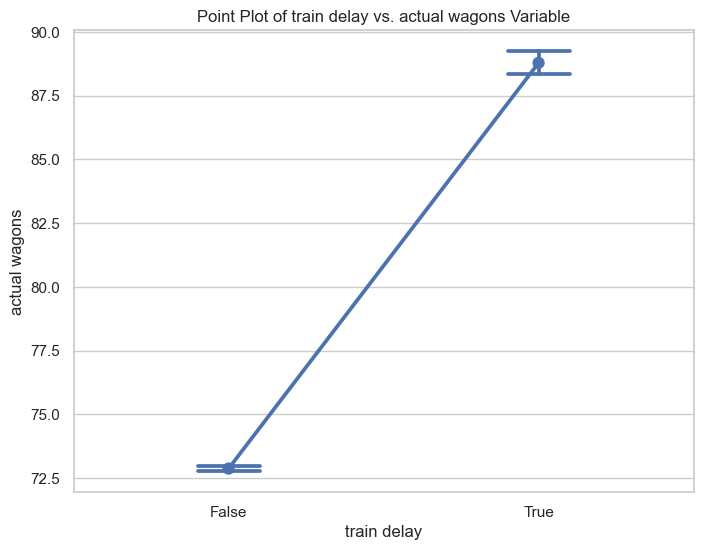

In [105]:
# 1. by actual wagons
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='Wagons.Actual', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. actual wagons Variable')
plt.xlabel('train delay')
plt.ylabel('actual wagons')
plt.show()

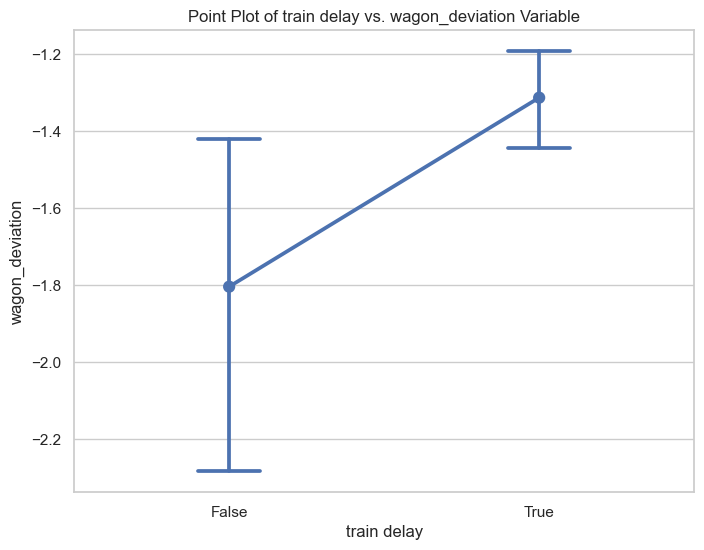

In [106]:
# by wagons devaiations
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='wagon_deviation', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. wagon_deviation Variable')
plt.xlabel('train delay')
plt.ylabel('wagon_deviation')
plt.show()

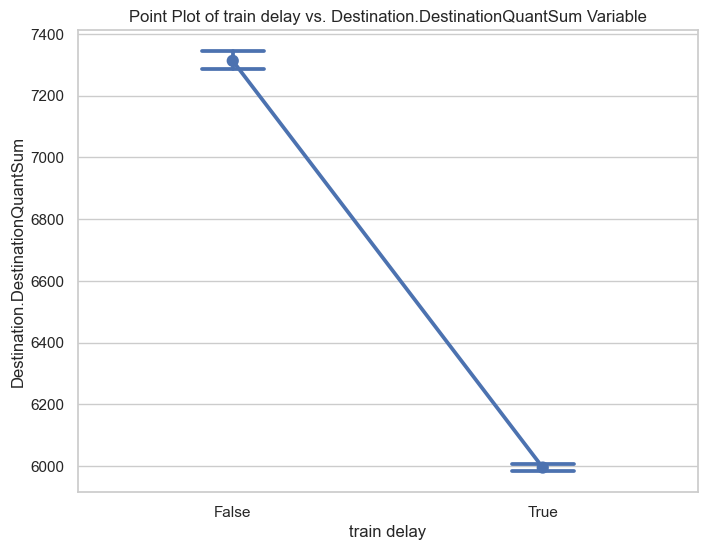

In [108]:
# 1. by actual tonnes loaded
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='Destination.DestinationQuantSum', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. Destination.DestinationQuantSum Variable')
plt.xlabel('train delay')
plt.ylabel('Destination.DestinationQuantSum')
plt.show()

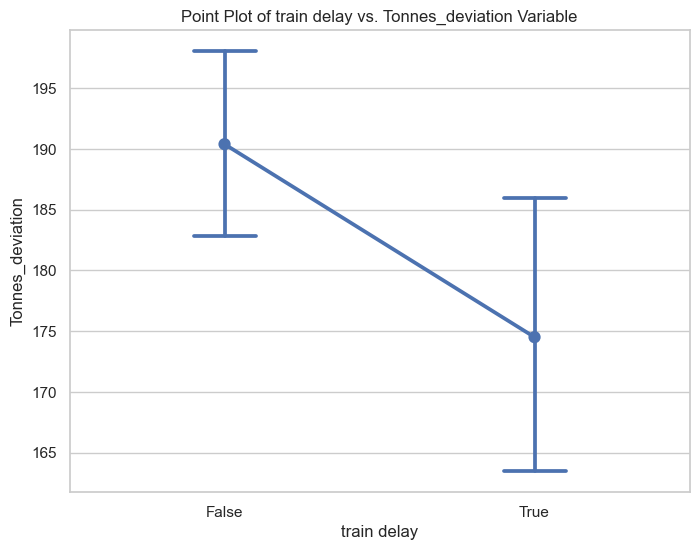

In [54]:
# by tonnes deviation
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='Tonnes_deviation', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. Tonnes_deviation Variable')
plt.xlabel('train delay')
plt.ylabel('Tonnes_deviation')
plt.show()

- When there are changes in wagons load and number of wagons, and if it's higher then trains are likely to delay

- When wagons are higher than planned there good chances that trains are going to delay but it is also not the only reasons, there are other reasons which might be affecting as well. If wagons are much less than planned then it has low chance of delay than if actual wagons were less than 2/3.
- In loads on the train analysis, it is found that tonnes loaded are low, even then it can be delayed. It shows that there are muliple reasons for train delays not only one for all cases.

### Multivariate analysis

In [55]:
# analyse mulitple columns to see intercolumns factors
multi_cross_tab = pd.crosstab(qmaster['start_diff'], [qmaster['BU'], qmaster['Customer'], qmaster['Route'], qmaster['Destination.Split']])
multi_cross_tab

BU                Location105 Location194 Coal                                 \
Customer                           Location169                 Location37       
Route               Location105 to Location125 Location105 to Location125       
Destination.Split                          1.0                        1.0 2.0   
start_diff                                                                      
False                                        1                          4  10   
True                                         0                          0   0   

BU                                                        \
Customer                                                   
Route             Location193 Location162 to Location125   
Destination.Split                                    1.0   
start_diff                                                 
False                                                  1   
True                                                   0   

BU                               Location13                                \
Customer                         Location35          Location35 EITAG       
Route             Location13 to Location125 Location13 to Location125       
Destination.Split                       1.0                       1.0 2.0   
start_diff                                                                  
False                                     1                       769  14   
True                                      0                         6   0   

BU                                                                     \
Customer                                                   Location79   
Route             Location74 to Location125 Location13 to Location125   
Destination.Split                       1.0                       1.0   
start_diff                                                              
False                                     2                        12   
True                                      0                         0   

BU                                        Location22 East  ...  \
Customer                                      Location173  ...   
Route             Location65 to Location125 (Location194)  ...   
Destination.Split                                     1.0  ...   
start_diff                                                 ...   
False                                                   3  ...   
True                                                    0  ...   

BU                    Location74 Location194 Coal                            \
Customer                              Location180          Location35 EITAG   
Route             Location74 to Location83 (CoAL) Location74 to Location125   
Destination.Split                             1.0                       1.0   
start_diff                                                                    
False                                           1                      7257   
True                                            0                        62   

BU                                                \
Customer                              Location37   
Route                 Location190 to Location125   
Destination.Split 2.0                        1.0   
start_diff                                         
False               3                        285   
True                0                          0   

BU                                                 \
Customer                                            
Route             Location74 to Location83 (CoAL)   
Destination.Split                             1.0   
start_diff                                          
False                                          40   
True                                            0   

BU                    Location80 Location194 Coal      \
Customer                         Location35 EITAG       
Route             Location80 to Location125 (84t)       
Destination.Split                 

- Observations:

1. Analysis observes multiple features to identify train delay. there are some customers, route and number of items as a load can affact the potential delay
2. Most numbers of delay happened with customer named `Location35 EITAG` and it has different routes, so major cause of delay could be from customer side
3. Majority of delay happened with only 1 customer.

In [109]:
# analyze by cancel reasons with multicross_tab
multi_cancel_cross_tab = pd.crosstab(qmaster['start_diff'], [qmaster['Cancelled.ReasonGroup'], qmaster['Cancelled.ReasonSubgroup']])
multi_cancel_cross_tab

Cancelled.ReasonGroup    Cancelled                                            \
Cancelled.ReasonSubgroup        BU Client Location125 Location172 Location38   
start_diff                                                                     
False                          738    577          29        3649         30   
True                             7      5           0          91          0   

Cancelled.ReasonGroup                        Location172 Decline  \
Cancelled.ReasonSubgroup Logistics Marketing         Location172   
start_diff                                                         
False                           13        79                   2   
True                             0         1                   0   

Cancelled.ReasonGroup    Location172 NO Prelim  \
Cancelled.ReasonSubgroup           Location172   
start_diff                                       
False                                       18   
True                                         0   

Cancelled.ReasonGroup    Location172 No Prelim-Not Approved  
Cancelled.ReasonSubgroup                        Location172  
start_diff                                                   
False                                                     4  
True                                                      0

- Observations:

1. cancel reason `Location172` AND cancel subgroup reason `Marketing` are the consequence of delayed trains. well, it sounds contradactory that if trains are delayed then why are they cancelled as well. but here assume that, delay happens first then cancellation.

### Analysis by wagons tipped and bypassed

1. By wagons tipped

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


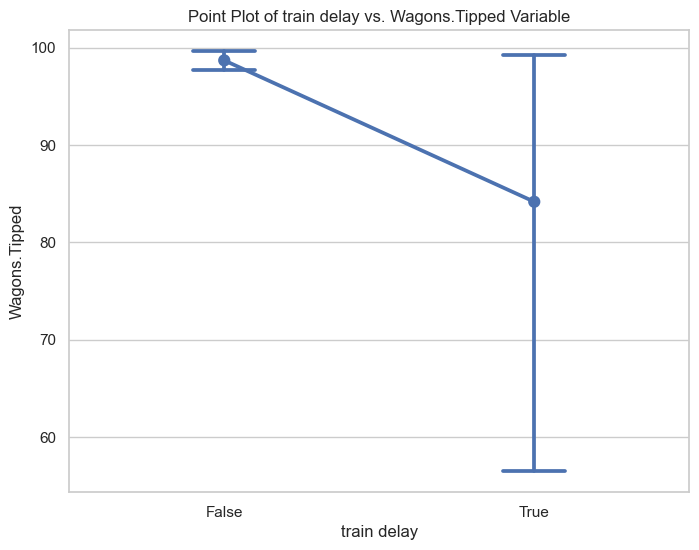

In [122]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='Wagons.Tipped', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. Wagons.Tipped Variable')
plt.xlabel('train delay')
plt.ylabel('Wagons.Tipped')
plt.show()

2. By wagons bypassed

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


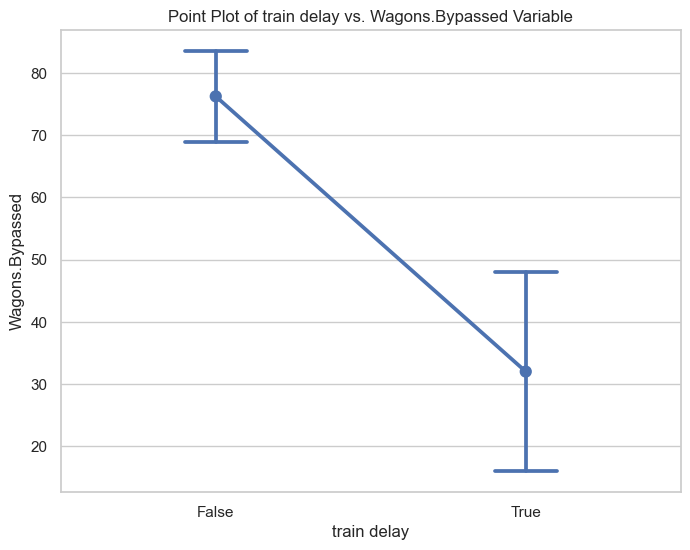

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.pointplot(x='start_diff', y='Wagons.Bypassed', data=qmaster, capsize=0.2)
plt.title('Point Plot of train delay vs. Wagons.Bypassed Variable')
plt.xlabel('train delay')
plt.ylabel('Wagons.Bypassed')
plt.show()

- If wagons are bypassed are low than train is highly likely while if bypassed wagons are high then trains are not likely to be delayed

## Analysis by weather data and load shedding

In [125]:
weather_df = pd.read_csv("external data\dataexport_20230811T142835.csv")
load_df = pd.read_csv("data\Eskom Loadshedding History.csv")

1. Let's check if load shedding time and train delay time matches or not

In [139]:
# convert created_at to the datetime
load_df['created_at'] = pd.to_datetime(load_df['created_at'])

In [140]:
load_df['created_at']

0     2023-03-23 05:00:00
1     2023-03-22 16:00:00
2     2023-03-22 05:00:00
3     2023-03-20 11:00:00
4     2023-03-20 05:00:00
              ...        
887   2015-06-02 07:00:00
888   2015-05-02 16:12:00
889   2015-05-02 08:00:00
890   2015-05-02 07:00:00
891   2015-04-02 14:45:00
Name: created_at, Length: 892, dtype: datetime64[ns]

In [146]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   created_at                   892 non-null    datetime64[ns]
 1   stage                        892 non-null    int64         
 2   Information on Loadshedding  1 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 21.0+ KB


In [145]:
qmaster_delay = qmaster[qmaster['start_diff'] == True]['NWB trains.NWBConfirmedDate']

In [147]:
merged_df = pd.merge(load_df, qmaster_delay, left_on='created_at', right_on='NWB trains.NWBConfirmedDate', how='inner')

In [154]:
# dates when both train delay and load shedding happened 
merged_df

,created_at,stage,Information on Loadshedding,NWB trains.NWBConfirmedDate
0,2022-11-10,0,NaN,2022-11-10
1,2022-07-23,0,NaN,2022-07-23


- Both train delays are of customer `Location35 EITAG` so if load shedding caused the train delay can't be confirmed

2. Analysis by weather factors

In [157]:
wea_df = weather_df[9:]

In [163]:
# weather measurements
weather_df.head(8)

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5
0,lat,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000
1,lon,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000
2,asl,363.653,363.653,363.653,363.653,363.653,363.653
3,variable,Temperature,Wind Gust,Cloud Cover Total,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low
4,unit,°C,km/h,%,%,%,%
5,level,2 m elevation corrected,sfc,sfc,high cld lay,mid cld lay,low cld lay
6,resolution,hourly,hourly,hourly,hourly,hourly,hourly
7,aggregation,None,None,None,None,None,None


In [158]:
wea_df.head()

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5
9,20090101T0000,0.9202454,9.72,39.0,0.0,30.0,39.0
10,20090101T0100,0.6202454,8.28,41.0,0.0,35.0,41.0
11,20090101T0200,0.3702454,9.0,61.0,0.0,39.0,61.0
12,20090101T0300,0.9002454,9.36,43.0,0.0,19.0,43.0
13,20090101T0400,0.6902454,9.36,67.0,0.0,15.0,67.0


In [159]:
# convert datetime object column into datetime
wea_df['location'] = pd.to_datetime(wea_df['location'])

C:\Users\Avi\AppData\Local\Temp\ipykernel_32600\382147537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wea_df['location'] = pd.to_datetime(wea_df['location'])


In [168]:
# merged dataframe of temp variation with train delay time stamps
merged_weather_df = pd.merge(wea_df, qmaster_delay, left_on='location', right_on='NWB trains.NWBConfirmedDate', how='left')

In [177]:
mask = merged_weather_df.notnull().all(axis=1)

# Apply the mask to the DataFrame
df_filtered = merged_weather_df[mask]
df_filtered

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5,NWB trains.NWBConfirmedDate
42927,2013-11-24 15:00:00,5.7602453,33.839996,76.0,0.0,39.0,76.0,2013-11-24 15:00:00
43080,2013-12-01 00:00:00,-1.0697546,14.04,18.0,0.0,2.0,18.0,2013-12-01 00:00:00
46224,2014-04-11 00:00:00,8.780245,12.24,0.0,0.0,0.0,0.0,2014-04-11 00:00:00
46272,2014-04-13 00:00:00,14.300245,14.4,84.0,98.0,84.0,22.0,2014-04-13 00:00:00
46273,2014-04-13 00:00:00,14.300245,14.4,84.0,98.0,84.0,22.0,2014-04-13 00:00:00
...,...,...,...,...,...,...,...,...
109197,2020-10-10 00:00:00,13.360246,18.72,72.0,0.0,72.0,7.0,2020-10-10 00:00:00
109653,2020-10-29 00:00:00,12.530245,34.92,93.0,100.0,93.0,24.0,2020-10-29 00:00:00
109725,2020-11-01 00:00:00,8.070246,19.44,18.0,25.0,18.0,0.0,2020-11-01 00:00:00
109773,2020-11-03 00:00:00,16.300245,18.72,78.0,0.0,78.0,53.0,2020-11-03 00:00:00


In [191]:
merged_weather_df['Basel'] = merged_weather_df['Basel'].astype(float)
merged_weather_df['Basel.1'] = merged_weather_df['Basel.1'].astype(float)
merged_weather_df['Basel.2'] = merged_weather_df['Basel.2'].astype(float)
merged_weather_df['Basel.3'] = merged_weather_df['Basel.3'].astype(float)
merged_weather_df['Basel.4'] = merged_weather_df['Basel.4'].astype(float)
merged_weather_df['Basel.5'] = merged_weather_df['Basel.5'].astype(float)

In [189]:
# create a new column to depict if train delay was there or not
merged_weather_df['train_delay_yn'] = merged_weather_df['NWB trains.NWBConfirmedDate'].notnull()

In [194]:
merged_weather_df.groupby('train_delay_yn')[['Basel','Basel.1','Basel.2','Basel.3','Basel.4','Basel.5']].mean()

,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5
train_delay_yn,,,,,,
False,11.530375,19.863133,48.721186,37.171779,35.680005,32.046962
True,6.085931,19.376572,57.061409,43.074400,48.101640,32.299795


- T-test to see if weather measurements are significant or not

In [196]:
# 1. for temperature parameter
import scipy.stats as stats

# Example data for two groups
group1 = merged_weather_df[merged_weather_df['train_delay_yn'] == True]['Basel']
group2 = merged_weather_df[merged_weather_df['train_delay_yn'] == False]['Basel']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # Set your significance level (commonly 0.05)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

T-statistic: -53.75471537046111
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


In [198]:
# 2. for wind gust parameter
import scipy.stats as stats

# Example data for two groups
group1 = merged_weather_df[merged_weather_df['train_delay_yn'] == True]['Basel.1']
group2 = merged_weather_df[merged_weather_df['train_delay_yn'] == False]['Basel.1']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.01  # Set your significance level (commonly 0.05)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

T-statistic: -3.5194789517562697
P-value: 0.00043256804306447227
Reject the null hypothesis: There is a significant difference between the groups.


In [199]:
# 3. for Cloud Cover Total parameter
import scipy.stats as stats

# Example data for two groups
group1 = merged_weather_df[merged_weather_df['train_delay_yn'] == True]['Basel.2']
group2 = merged_weather_df[merged_weather_df['train_delay_yn'] == False]['Basel.2']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # Set your significance level (commonly 0.05)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

T-statistic: 19.192210511803466
P-value: 5.838960754038762e-82
Reject the null hypothesis: There is a significant difference between the groups.
